## Lead Scoring Case Study
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. <br><br>
X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
pd.set_option('display.max_colwidth',-1)

In [34]:
# Read data
lead_data = pd.read_csv(r"Leads.csv")


### Step 2: Inspecting the Dataframe

In [5]:
# Let's see the head of our master dataset
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620  660737       API                       
1  2a272436-5132-4136-86fa-dcc88c88f482  660728       API                       
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  660727       Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  660719       Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  660681       Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0  Olark Chat      No           No          0          0.0           
1  Organic Search  No           No          0          5.0           
2  Direct Traffic  No           No          1          2.0           
3  Direct Traffic  No           No          0          1.0           
4  Google          No           No          1          2.0           

   Total Time Spent on Website  Page Views Per Visit          ...           \
0  0                            0.0                           ...            
1  674                          2.5                           ...            
2  1532                         2.0                           ...            
3  305                          1.0                           ...            
4  1428                         1.0                           ...            

  Get updates on DM Content    Lead Profile    City  \
0  No                        Select          Select   
1  No                        Select          Select   
2  No                        Potential Lead  Mumbai   
3  No                        Select          Mumbai   
4  No                        Select          Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0  02.Medium                   02.Medium                   
1  02.Medium                   02.Medium                   
2  02.Medium                   01.High                     
3  02.Medium                   01.High                     
4  02.Medium                   01.High                     

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0  15.0                        15.0                        
1  15.0                        15.0                        
2  14.0                        20.0                        
3  13.0                        17.0                        
4  15.0                        18.0                        

  I agree to pay the amount through cheque  \
0  No                                        
1  No                                        
2  No                                        
3  No                                        
4  No                                        

  A free copy of Mastering The Interview Last Notable Activity  
0  No                                     Modified              
1  No                                     Email Opened          
2  Yes                                    Email Opened          
3  No                                     Modified              
4  No                                     Modified              

[5 rows x 37 columns]

In [35]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [7]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000    9240.000000  9103.000000  9240.000000                   
mean   617188.435606  0.385390     3.445238     487.698268                    
std    23405.995698   0.486714     4.854853     548.021466                    
min    579533.000000  0.000000     0.000000     0.000000                      
25%    596484.500000  0.000000     1.000000     12.000000                     
50%    615479.000000  0.000000     3.000000     248.000000                    
75%    637387.250000  1.000000     5.000000     936.000000                    
max    660737.000000  1.000000     251.000000   2272.000000                   

       Page Views Per Visit  Asymmetrique Activity Score  \
count  9103.000000           5022.000000                   
mean   2.362820              14.306252                     
std    2.161418              1.386694                      
min    0.000000              7.000000                      
25%    1.000000              14.000000                     
50%    2.000000              14.000000                     
75%    3.000000              15.000000                     
max    55.000000             18.000000                     

       Asymmetrique Profile Score  
count  5022.000000                 
mean   16.344883                   
std    1.811395                    
min    11.000000                   
25%    15.000000                   
50%    16.000000                   
75%    18.000000                   
max    20.000000

In [8]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [9]:
#Column wise pecentage null values
lead_data.isnull().sum(axis=0)
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                      0.00 
Lead Number                                      0.00 
Lead Origin                                      0.00 
Lead Source                                      0.39 
Do Not Email                                     0.00 
Do Not Call                                      0.00 
Converted                                        0.00 
TotalVisits                                      1.48 
Total Time Spent on Website                      0.00 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                           0.00 
Magazine                                         0.00 
Newspaper 

### Step 3: Data Preparation

In [36]:
# Lead Quality - This field is populated manually based on intuition of the person assgined to pursue the lead. 
# This column can be dropped as it has more than 51% empty and doesnt help in scientific analysis.
# Tag - this is added to indicate the current status of the lead . Not needed for analysis.
# Lead Profile - A tag assigned to indicate if this is a potential lead. not needed for analysis.
# Asymmetrique Indexes - These are defined by marketing analytics to provide if a customer is a potential lead or not 
lead_data.drop(['Lead Quality', 'Tags','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1, inplace=True)

In [37]:
# Impute for TotalVisits
bins = [0, 300, 600, 900, 1200, 1500]
Time=lead_data.loc[(~lead_data['Total Time Spent on Website'].isnull())]
lead_data['Time_binned'] = pd.cut(Time['Total Time Spent on Website'], bins)

groupbytime=lead_data.groupby('Time_binned')
groupbytime.TotalVisits.mean()  

for i, r in lead_data['TotalVisits'].iteritems():
    if np.isnan(r):
        if (lead_data['Time_binned'][i] == '(0, 300]' )| (lead_data['Time_binned'][i] == '(300, 600]' ):
            lead_data['TotalVisits'][i]=4
        else:
            lead_data['TotalVisits'][i]=5      

In [38]:
# impute value for City /Country
countrynull=lead_data.loc[(lead_data.Country.isnull())]
countrynull.City.unique()

#'Select', nan, 'Thane & Outskirts', 'Other Cities of Maharashtra','Mumbai', 'Other Cities', 'Other Metro Cities', 
#'Tier II Cities'

# Impute Country as India if City is within India. 'unknown', otherwise.

lead_data.loc[(lead_data.City=='Tier II Cities') & (lead_data.Country.isnull()), ['Country']]='India'
lead_data.loc[(lead_data.City=='Mumbai') & (lead_data.Country.isnull()), ['Country']]='India'
lead_data.loc[(lead_data.City=='Thane & Outskirts') & (lead_data.Country.isnull()), ['Country']]='India'
lead_data.loc[(lead_data.City=='Other Cities of Maharashtra') & (lead_data.Country.isnull()), ['Country']]='India'
lead_data.loc[(lead_data.City=='Other Metro Cities') & (lead_data.Country.isnull()), ['Country']]='unknown'
lead_data.loc[(lead_data.City=='Other Cities') & (lead_data.Country.isnull()), ['Country']]='unknown'
lead_data.loc[(lead_data.City=='Select') & (lead_data.Country.isnull()), ['Country']]='unknown'
lead_data.loc[(lead_data.City=='Other Metro Cities') & (lead_data.Country.isnull()), ['Country']]='unknown'
lead_data.loc[(lead_data.Country.isnull()), ['Country']]='unknown'

# Impute City with unknown 
lead_data['City'].fillna('unknown', inplace=True)
lead_data['City'].replace('Select','unknown', inplace=True)

#Impute lead Source data for google (same as Google)
lead_data['Lead Source'].replace('google','Google', inplace=True)

In [39]:
lead_data.Country.unique()

array(['unknown', 'India', 'Russia', 'Kuwait', 'Oman',
       'United Arab Emirates', 'United States', 'Australia',
       'United Kingdom', 'Bahrain', 'Ghana', 'Singapore', 'Qatar',
       'Saudi Arabia', 'Belgium', 'France', 'Sri Lanka', 'China',
       'Canada', 'Netherlands', 'Sweden', 'Nigeria', 'Hong Kong',
       'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya', 'Italy',
       'South Africa', 'Tanzania', 'Malaysia', 'Liberia', 'Switzerland',
       'Denmark', 'Philippines', 'Bangladesh', 'Vietnam', 'Indonesia'],
      dtype=object)

In [40]:
#Impute for Lead Source
leadsourcenull=lead_data.loc[(lead_data['Lead Source'].isnull())]
groupbysourcenull=leadsourcenull.groupby('Lead Origin')
groupbysourcenull['Lead Origin'].count()

# Lead Add Form is the prominent category where Lead Source is Null.

leadaddform=lead_data.loc[(lead_data['Lead Origin']=='Lead Add Form')]
addformgroup=leadaddform.groupby('Lead Source')
addformgroup['Lead Source'].count()

# Reference is the max occuring type of lead source when lead origin is Lead Add form .

#Impute the missing Lead Source with 'Reference'
lead_data['Lead Source'].fillna('Reference', inplace=True)

In [41]:
#Impute for Specialisation
lead_data['Specialization'].fillna('No Specialization', inplace=True)
lead_data['Specialization'].replace('Select','No Specialization', inplace=True)

In [42]:
#Impute for How did you hear about X Education
lead_data['How did you hear about X Education'].fillna('No Selection', inplace=True)
lead_data['How did you hear about X Education'].replace('Select','No Selection', inplace=True)

In [43]:
#Impute for What is your current occupation
lead_data['What is your current occupation'].fillna('No Selection', inplace=True)
lead_data['What is your current occupation'].replace('Select','No Selection', inplace=True)

In [44]:
# Impute for What matters most to you in choosing a course
lead_data['What matters most to you in choosing a course'].fillna('No Selection', inplace=True)
lead_data['What matters most to you in choosing a course'].replace('Select','No Selection', inplace=True)

In [45]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          9240 non-null object
Specialization                                   9240 

In [46]:
# Impute for Page Views per Visit

pageview=lead_data.loc[(lead_data['Page Views Per Visit'].notnull() ) & (lead_data['TotalVisits'] >0.0) & (lead_data['Page Views Per Visit'] > 0.0 )]

sum(pageview['Page Views Per Visit']/pageview['TotalVisits'])/pageview.shape[0]
# ~0.8 is the averge page visited for every visit. 

# imputing Page Views per Visit
lead_data['Page Views Per Visit'] = round(lead_data.apply(lambda x: x['TotalVisits']*0.8 if np.isnan(x['Page Views Per Visit']) else x['Page Views Per Visit'], axis=1))

In [47]:
lead_data.shape

(9240, 31)

In [48]:
# Converting some binary variables (Yes/No) to 0/1
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [49]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source','Country','Specialization','City','How did you hear about X Education','What matters most to you in choosing a course','What is your current occupation','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)

In [51]:
# Dropping columns which has only value No. 
lead_data.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1,inplace=True)

In [53]:
# Dropping repeated categorical values and values not needed for analyis.
lead_data.drop(['Prospect ID','Lead Number','Lead Origin', 'Lead Source','Country','Specialization','City','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','What matters most to you in choosing a course','Last Notable Activity'], axis=1, inplace=True)

In [55]:
lead_data.drop(['Last Activity'],axis=1, inplace=True)

In [56]:
lead_data.drop(['Time_binned'],axis=1, inplace=True)

### Checking outliers

In [57]:
# Checking for outliers in the continuous variables
num_lead= lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000  9240.000000                  9240.000000         
mean   3.468290     487.698268                   2.391991            
std    4.822386     548.021466                   2.153846            
min    0.000000     0.000000                     0.000000            
25%    1.000000     12.000000                    1.000000            
50%    3.000000     248.000000                   2.000000            
75%    5.000000     936.000000                   4.000000            
90%    7.000000     1380.000000                  5.000000            
95%    10.000000    1562.000000                  6.000000            
99%    17.000000    1840.610000                  9.000000            
max    251.000000   2272.000000                  55.000000

In [58]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

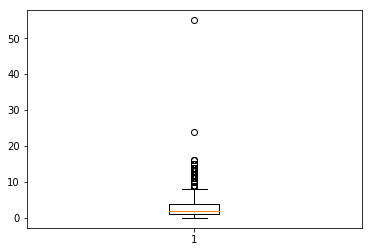

In [59]:
# outlier treatment for ['Page Views Per Visit']

plt.boxplot(lead_data['Page Views Per Visit'])
Q1 = lead_data['Page Views Per Visit'].quantile(0.25)
Q3 = lead_data['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
lead_data = lead_data[(lead_data['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead_data['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

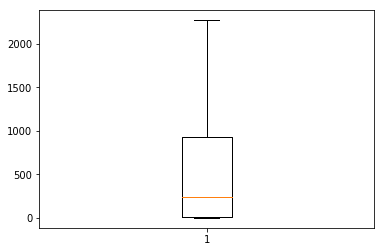

In [60]:
# outlier treatment for ['Total Time Spent on Website']

plt.boxplot(lead_data['Total Time Spent on Website'])
Q1 = lead_data['Total Time Spent on Website'].quantile(0.25)
Q3 = lead_data['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
lead_data = lead_data[(lead_data['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (lead_data['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]

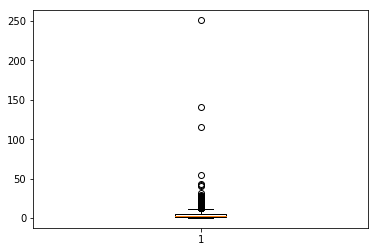

In [61]:
# outlier treatment for TotalVisits

plt.boxplot(lead_data.TotalVisits)
Q1 = lead_data.TotalVisits.quantile(0.25)
Q3 = lead_data.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
lead_data = lead_data[(lead_data.TotalVisits >= Q1 - 1.5*IQR) & (lead_data.TotalVisits <= Q3 + 1.5*IQR)]

In [146]:
lead_data.shape
pd.set_option('display.max_columns', None)

In [147]:
lead_data.head()

Do Not Email  Do Not Call  Converted  TotalVisits  Search  Newspaper  \
0  0             0            0          0.0          0       0           
1  0             0            0          5.0          0       0           
2  0             0            1          2.0          0       0           
3  0             0            0          1.0          0       0           
4  0             0            1          2.0          0       0           

   Digital Advertisement  Through Recommendations  Lead Origin_Lead Add Form  \
0  0                      0                        0                           
1  0                      0                        0                           
2  0                      0                        0                           
3  0                      0                        0                           
4  0                      0                        0                           

   Lead Origin_Quick Add Form  Lead Source_Direct Traffic  \
0  0                           0                            
1  0                           0                            
2  0                           1                            
3  0                           1                            
4  0                           0                            

   Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
0  0                     0                   0                       
1  0                     0                   0                       
2  0                     0                   0                       
3  0                     0                   0                       
4  0                     1                   0                       

   Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
0  0                   1                       0                            
1  0                   0                       1                            
2  0                   0                       0                            
3  0                   0                       0                            
4  0                   0                       0                            

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0  0                              0                           
1  0                              0                           
2  0                              0                           
3  0                              0                           
4  0                              0                           

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0  0                           0                         0                     
1  0                           0                         0                     
2  0                           0                         0                     
3  0                           0                         0                     
4  0                           0                         0                     

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0  0                             0                 0                  
1  0                             0                 0                  
2  0                             0                 0                  
3  0                             0                 0                  
4  0                             0                 0                  

   Lead Source_testone  Lead Source_welearnblog_Home  \
0  0                    0                              
1  0                    0                              
2  0                    0                              
3  0                    0                              
4  0                    0                              

   Lead Source_youtubechannel  Country_Australia  Country_Bahrain  \
0  0                           0                  0                 
1  0                           0                  0       

### Step 4: Looking at Correlations

In [63]:
lead_data.corr()

Do Not Email  \
Do Not Email                                                             1.000000       
Do Not Call                                                             -0.004370       
Converted                                                               -0.132322       
TotalVisits                                                             -0.014669       
Total Time Spent on Website                                             -0.045323       
Page Views Per Visit                                                     0.017488       
Search                                                                  -0.009776       
Newspaper Article                                                       NaN             
X Education Forums                                                      NaN             
Newspaper                                                               -0.003090       
Digital Advertisement                                                   -0.004370       
Through Recommendations                                                 -0.007571       
A free copy of Mastering The Interview                                   0.053111       
Lead Origin_Landing Page Submission                                      0.094086       
Lead Origin_Lead Add Form                                               -0.019793       
Lead Origin_Lead Import                                                 -0.017641       
Lead Origin_Quick Add Form                                               0.036421       
Lead Source_Direct Traffic                                               0.105015       
Lead Source_Facebook                                                    -0.017641       
Lead Source_Google                                                      -0.067771       
Lead Source_Live Chat                                                   -0.004370       
Lead Source_NC_EDM                                                      -0.003090       
Lead Source_Olark Chat                                                  -0.051347       
Lead Source_Organic Search                                               0.038077       
Lead Source_Pay per Click Ads                                           -0.003090       
Lead Source_Press_Release                                                0.036421       
Lead Source_Reference                                                   -0.019567       
Lead Source_Referral Sites                                              -0.009865       
Lead Source_Social Media                                                -0.004370       
Lead Source_WeLearn                                                     -0.003090       
...                                                                           ...       
How did you hear about X Education_Online Search                        -0.041208       
How did you hear about X Education_Other                                -0.020701       
How did you hear about X Education_SMS                                   0.001661       
How did you hear about X Education_Social Media                          0.004931       
How did you hear about X Education_Student of SomeSchool                -0.024276       
How did you hear about X Education_Word Of Mouth                        -0.019665       
What matters most to you in choosing a course_Flexibility & Convenience -0.004370       
What matters most to you in choosing a course_No Selection               0.058374       
What matters most to you in choosing a course_Other                     -0.003090       
What is your current occupation_Housewife                               -0.009776       
What is your current occupation_No Selection                             0.049663       
What is your current occupation_Other                                   -0.001002       
What is your current occupation_Student                                  0.008525       
What is your current occupation_Unemployed                          

In [64]:
# Get the Top N correlated paramemters as a table for easier analysis as Heat Map is not useful here. 

abs_value=lead_data.corr().abs()
unstack_corr = abs_value.unstack()
corr = unstack_corr.sort_values(kind="quicksort", ascending=False)
corr=pd.DataFrame(corr, columns=['correlation'])
corr_less=corr.loc[(corr.correlation < 1 )]
corr_less.head(10)

correlation
What is your current occupation_No Selection               What matters most to you in choosing a course_No Selection  0.995138   
What matters most to you in choosing a course_No Selection What is your current occupation_No Selection                0.995138   
Lead Origin_Lead Import                                    Lead Source_Facebook                                        0.981705   
Lead Source_Facebook                                       Lead Origin_Lead Import                                     0.981705   
Country_unknown                                            Country_India                                               0.922687   
Country_India                                              Country_unknown                                             0.922687   
Lead Origin_Lead Add Form                                  Lead Source_Reference                                       0.878980   
Lead Source_Reference                                      Lead Origin_Lead Add Form                                   0.878980   
City_unknown                                               Specialization_No Specialization                            0.845211   
Specialization_No Specialization                           City_unknown                                                0.845211

In [65]:
# Remove highly correlated values 
lead_data.drop(['What matters most to you in choosing a course_No Selection','Lead Origin_Lead Import','Country_unknown','Lead Source_Reference'], axis=1, inplace=True)

In [66]:
# Recheck for next top correlated variables
abs_value=lead_data.corr().abs()
unstack_corr = abs_value.unstack()
corr = unstack_corr.sort_values(kind="quicksort", ascending=False)
corr=pd.DataFrame(corr, columns=['correlation'])
corr_less=corr.loc[(corr.correlation < 1 )]
corr_less.head(30)

correlation
Specialization_No Specialization                 City_unknown                                      0.845211   
City_unknown                                     Specialization_No Specialization                  0.845211   
                                                 Lead Origin_Landing Page Submission               0.809534   
Lead Origin_Landing Page Submission              City_unknown                                      0.809534   
What is your current occupation_No Selection     What is your current occupation_Unemployed        0.796014   
What is your current occupation_Unemployed       What is your current occupation_No Selection      0.796014   
TotalVisits                                      Page Views Per Visit                              0.771858   
Page Views Per Visit                             TotalVisits                                       0.771858   
Specialization_No Specialization                 Lead Origin_Landing Page Submission               0.750701   
Lead Origin_Landing Page Submission              Specialization_No Specialization                  0.750701   
Lead Source_Olark Chat                           Country_India                                     0.720676   
Country_India                                    Lead Source_Olark Chat                            0.720676   
A free copy of Mastering The Interview           Lead Source_Direct Traffic                        0.622517   
Lead Source_Direct Traffic                       A free copy of Mastering The Interview            0.622517   
How did you hear about X Education_Online Search How did you hear about X Education_No Selection   0.587237   
How did you hear about X Education_No Selection  How did you hear about X Education_Online Search  0.587237   
Country_India                                    City_unknown                                      0.585743   
City_unknown                                     Country_India                                     0.585743   
Page Views Per Visit                             Country_India                                     0.572904   
Country_India                                    Page Views Per Visit                              0.572904   
A free copy of Mastering The Interview           Lead Origin_Landing Page Submission               0.569568   
Lead Origin_Landing Page Submission              A free copy of Mastering The Interview            0.569568   
Lead Source_Olark Chat                           Page Views Per Visit                              0.566486   
Page Views Per Visit                             Lead Source_Olark Chat                            0.566486   
Lead Source_Google                               How did you hear about X Education_No Selection   0.563662   
How did you hear about X Education_No Selection  Lead Source_Google                                0.563662   
TotalVisits                                      Country_India                                     0.551382   
Country_India                                    TotalVisits                                       0.551382   
City_unknown                                     A free copy of Mastering The Interview            0.542812   
A free copy of Mastering The Interview           City_unknown                                      0.542812

In [67]:
# Remove highly correlated values 
lead_data.drop(['City_unknown','Lead Origin_Landing Page Submission','Country_India','How did you hear about X Education_No Selection','A free copy of Mastering The Interview','Page Views Per Visit'], axis=1, inplace=True)

In [68]:
### Recheck for next top correlated variables
abs_value=lead_data.corr().abs()
unstack_corr = abs_value.unstack()
corr = unstack_corr.sort_values(kind="quicksort", ascending=False)
corr=pd.DataFrame(corr, columns=['correlation'])
corr_less=corr.loc[(corr.correlation < 1 )]
corr_less.head(30)

correlation
What is your current occupation_No Selection What is your current occupation_Unemployed    0.796014   
What is your current occupation_Unemployed   What is your current occupation_No Selection  0.796014   
Lead Source_Olark Chat                       TotalVisits                                   0.526030   
TotalVisits                                  Lead Source_Olark Chat                        0.526030   
Last Notable Activity_Email Opened           Last Notable Activity_Modified                0.512030   
Last Notable Activity_Modified               Last Notable Activity_Email Opened            0.512030   
Specialization_No Specialization             Lead Source_Olark Chat                        0.501347   
Lead Source_Olark Chat                       Specialization_No Specialization              0.501347   
Lead Source_youtubechannel                   Country_Canada                                0.499916   
Country_Canada                               Lead Source_youtubechannel                    0.499916   
Lead Source_Welingak Website                 Lead Origin_Lead Add Form                     0.429582   
Lead Origin_Lead Add Form                    Lead Source_Welingak Website                  0.429582   
Last Notable Activity_Modified               Last Notable Activity_SMS Sent                0.429171   
Last Notable Activity_SMS Sent               Last Notable Activity_Modified                0.429171   
Lead Source_Google                           Lead Source_Direct Traffic                    0.415120   
Lead Source_Direct Traffic                   Lead Source_Google                            0.415120   
Specialization_No Specialization             TotalVisits                                   0.404282   
TotalVisits                                  Specialization_No Specialization              0.404282   
Lead Source_Direct Traffic                   Specialization_No Specialization              0.398012   
Specialization_No Specialization             Lead Source_Direct Traffic                    0.398012   
Lead Source_Olark Chat                       Total Time Spent on Website                   0.381085   
Total Time Spent on Website                  Lead Source_Olark Chat                        0.381085   
                                             TotalVisits                                   0.379845   
TotalVisits                                  Total Time Spent on Website                   0.379845   
Last Notable Activity_Email Opened           Last Notable Activity_SMS Sent                0.370075   
Last Notable Activity_SMS Sent               Last Notable Activity_Email Opened            0.370075   
Converted                                    Last Notable Activity_SMS Sent                0.357757   
Last Notable Activity_SMS Sent               Converted                                     0.357757   
Total Time Spent on Website                  Converted                                     0.356104   
Converted                                    Total Time Spent on Website                   0.356104

In [69]:
# Remove highly correlated values 
lead_data.drop(['What is your current occupation_Unemployed','Total Time Spent on Website','Specialization_No Specialization','Last Notable Activity_Modified'], axis=1, inplace=True)

In [70]:
# Recheck for next top correlated variables
abs_value=lead_data.corr().abs()
unstack_corr = abs_value.unstack()
corr = unstack_corr.sort_values(kind="quicksort", ascending=False)
corr=pd.DataFrame(corr, columns=['correlation'])
corr_less=corr.loc[(corr.correlation < 1 )]
corr_less.head(20)

correlation
Lead Source_Olark Chat                           TotalVisits                                       0.526030   
TotalVisits                                      Lead Source_Olark Chat                            0.526030   
Country_Canada                                   Lead Source_youtubechannel                        0.499916   
Lead Source_youtubechannel                       Country_Canada                                    0.499916   
Lead Source_Welingak Website                     Lead Origin_Lead Add Form                         0.429582   
Lead Origin_Lead Add Form                        Lead Source_Welingak Website                      0.429582   
Lead Source_Google                               Lead Source_Direct Traffic                        0.415120   
Lead Source_Direct Traffic                       Lead Source_Google                                0.415120   
Last Notable Activity_SMS Sent                   Last Notable Activity_Email Opened                0.370075   
Last Notable Activity_Email Opened               Last Notable Activity_SMS Sent                    0.370075   
Converted                                        Last Notable Activity_SMS Sent                    0.357757   
Last Notable Activity_SMS Sent                   Converted                                         0.357757   
Lead Source_Olark Chat                           Lead Source_Google                                0.334556   
Lead Source_Google                               Lead Source_Olark Chat                            0.334556   
Lead Origin_Lead Add Form                        Converted                                         0.328792   
Converted                                        Lead Origin_Lead Add Form                         0.328792   
How did you hear about X Education_Online Search Lead Source_Google                                0.328691   
Lead Source_Google                               How did you hear about X Education_Online Search  0.328691   
Converted                                        What is your current occupation_No Selection      0.327008   
What is your current occupation_No Selection     Converted                                         0.327008

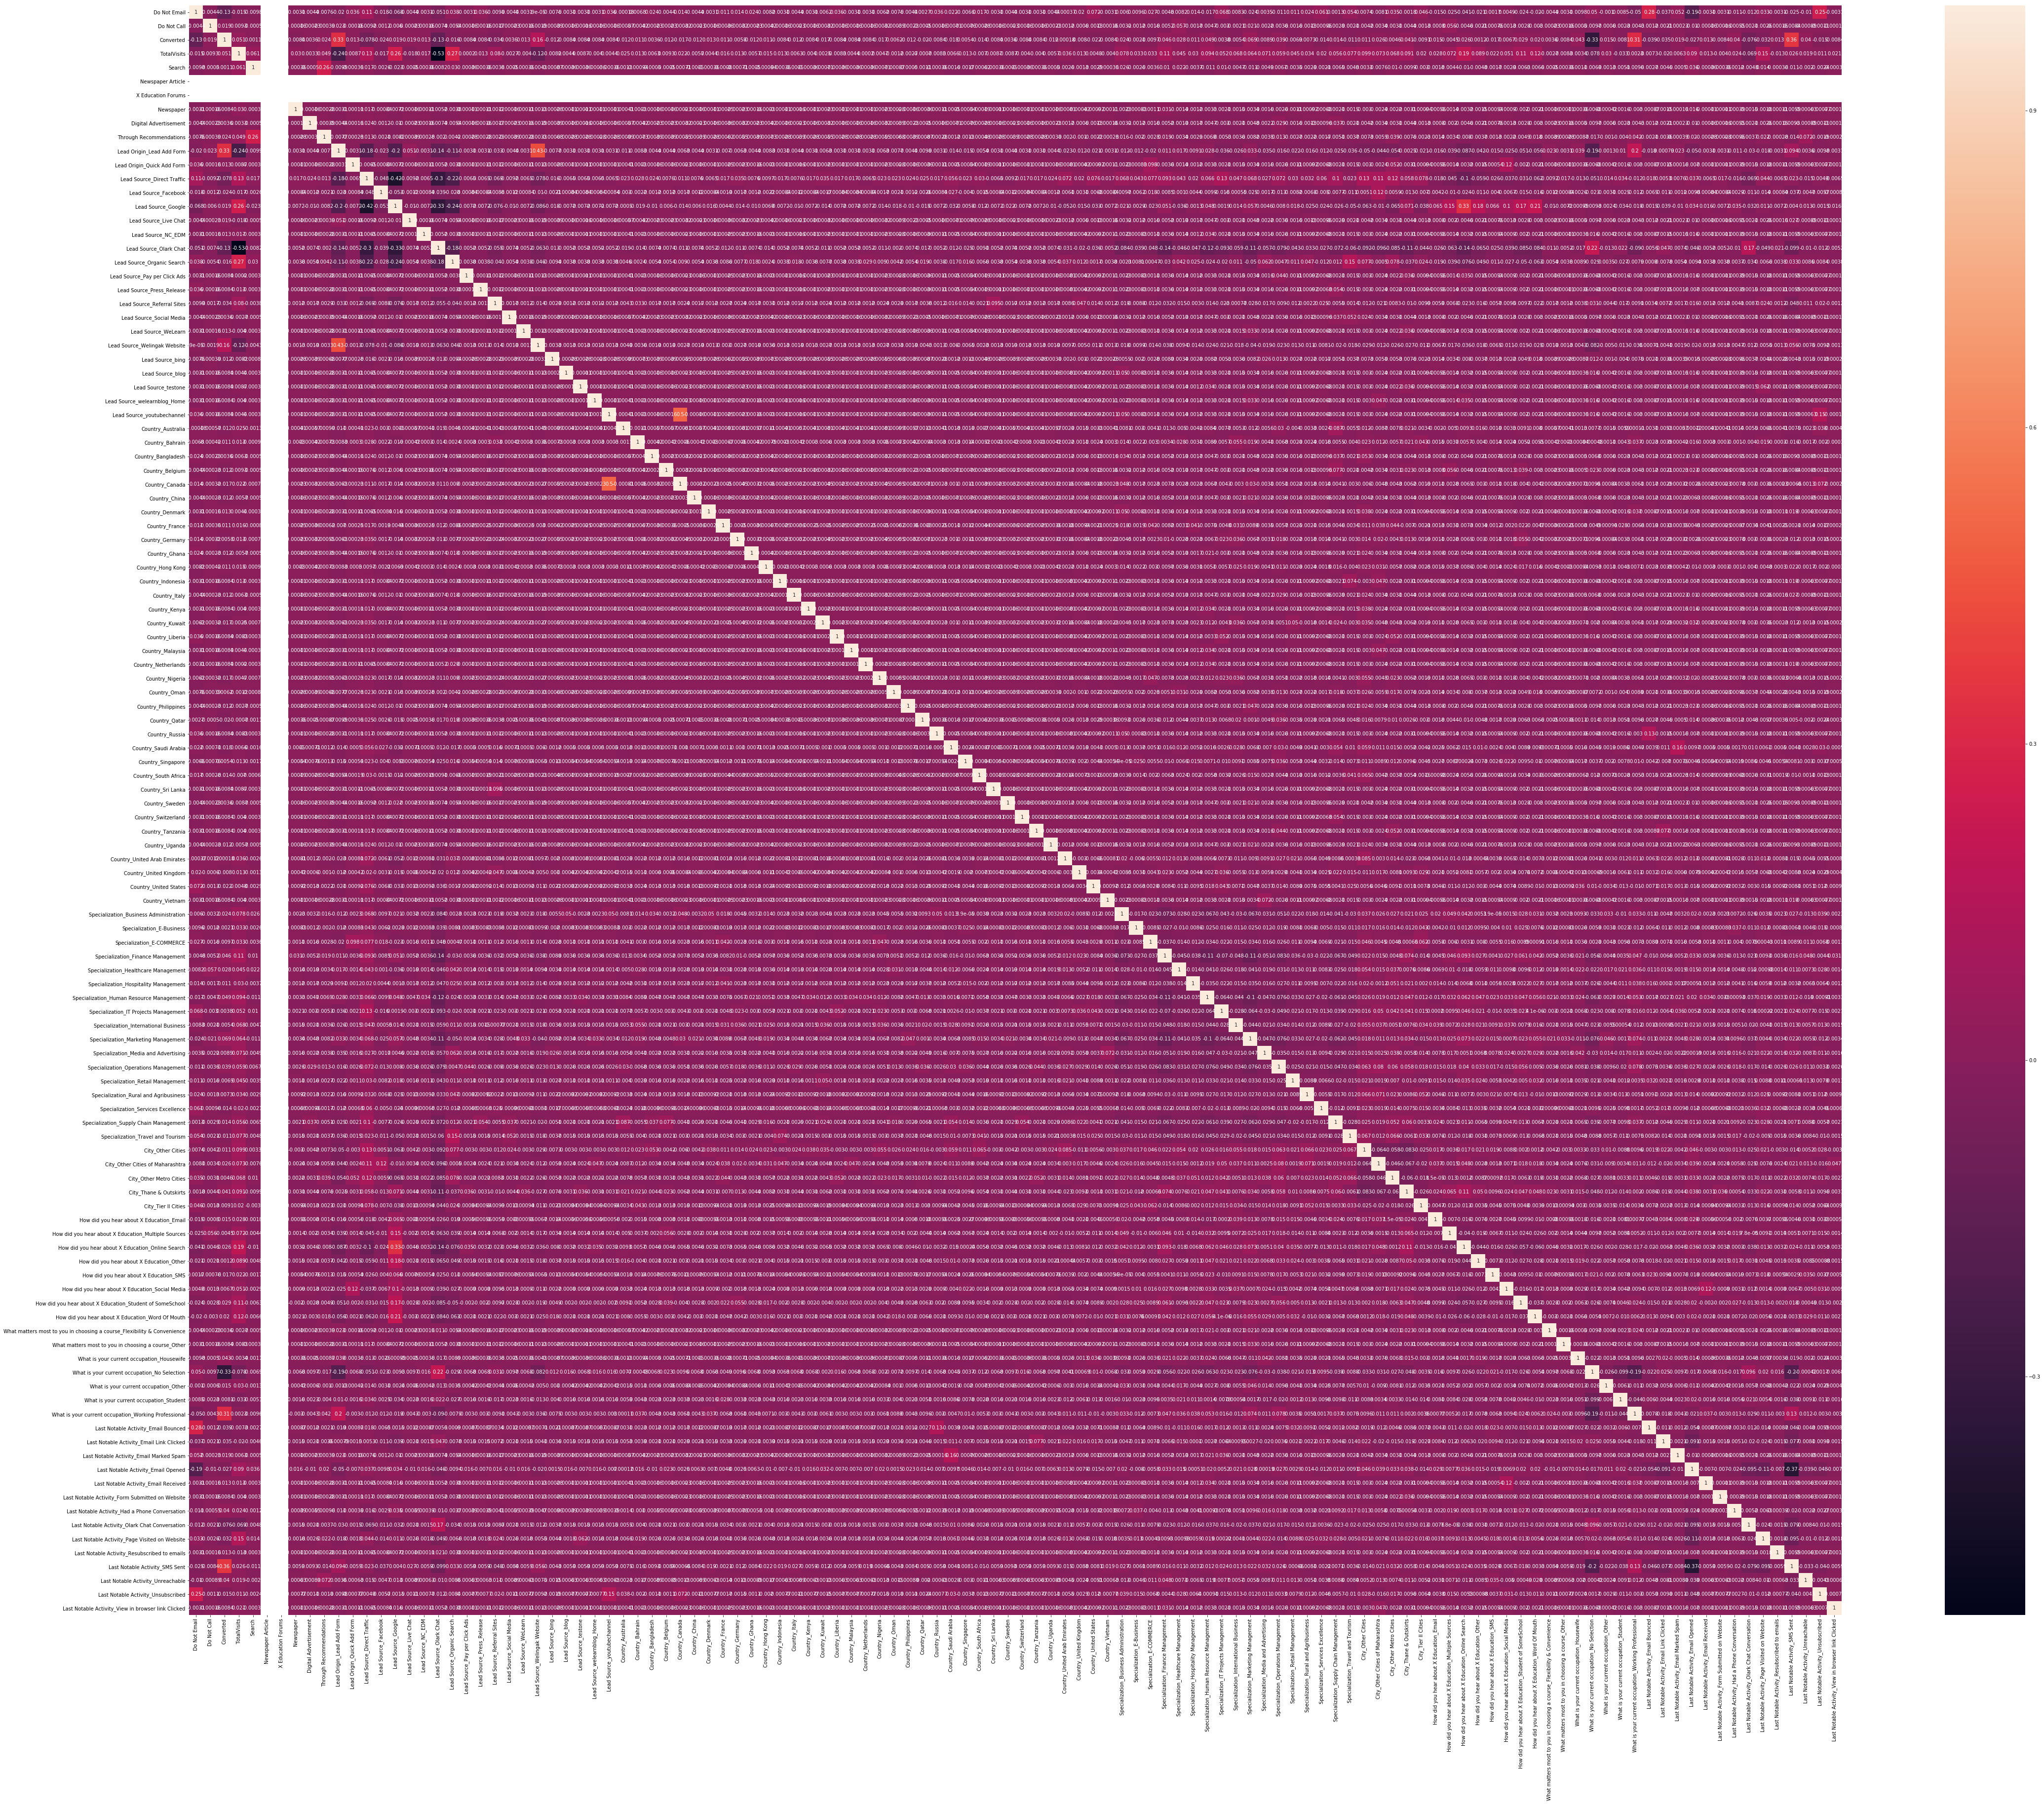

In [71]:
# correlation matrix 
plt.figure(figsize = (75,60))        
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

In [72]:
lead_data.describe()

Do Not Email  Do Not Call    Converted  TotalVisits       Search  \
count  8887.000000   8887.000000  8887.000000  8887.000000  8887.000000   
mean   0.078204      0.000225     0.383481     2.951840     0.001125      
std    0.268508      0.015001     0.486261     2.500808     0.033528      
min    0.000000      0.000000     0.000000     0.000000     0.000000      
25%    0.000000      0.000000     0.000000     1.000000     0.000000      
50%    0.000000      0.000000     0.000000     3.000000     0.000000      
75%    0.000000      0.000000     1.000000     4.000000     0.000000      
max    1.000000      1.000000     1.000000     11.000000    1.000000      

       Newspaper Article  X Education Forums    Newspaper  \
count  8887.0             8887.0              8887.000000   
mean   0.0                0.0                 0.000113      
std    0.0                0.0                 0.010608      
min    0.0                0.0                 0.000000      
25%    0.0                0.0                 0.000000      
50%    0.0                0.0                 0.000000      
75%    0.0                0.0                 0.000000      
max    0.0                0.0                 1.000000      

       Digital Advertisement  Through Recommendations  \
count  8887.000000            8887.000000               
mean   0.000225               0.000675                  
std    0.015001               0.025976                  
min    0.000000               0.000000                  
25%    0.000000               0.000000                  
50%    0.000000               0.000000                  
75%    0.000000               0.000000                  
max    1.000000               1.000000                  

                              ...                          \
count                         ...                           
mean                          ...                           
std                           ...                           
min                           ...                           
25%                           ...                           
50%                           ...                           
75%                           ...                           
max                           ...                           

       Last Notable Activity_Email Received  \
count  8887.000000                            
mean   0.000113                               
std    0.010608                               
min    0.000000                               
25%    0.000000                               
50%    0.000000                               
75%    0.000000                               
max    1.000000                               

       Last Notable Activity_Form Submitted on Website  \
count  8887.000000                                       
mean   0.000113                                          
std    0.010608                                          
min    0.000000                                          
25%    0.000000                                          
50%    0.000000                                          
75%    0.000000                                          
max    1.000000                                          

       Last Notable Activity_Had a Phone Conversation  \
count  8887.000000                                      
mean   0.001350                                         
std    0.036723                                         
min    0.000000                                         
25%    0.000000                                         
50%    0.000000                                         
75%    0.000000                                         
max    1.000000                                         

       Last Notable Activity_Olark Chat Conversation  \
count  8887.000000                                     
mean   0.019917                                        
std    0.139722                                        
min    0.000000                 

In [73]:
# Values having only a single value found
for col in lead_data:
    if len(lead_data[col].unique()) ==1 :
        print( col )

Newspaper Article
X Education Forums


In [74]:
# Dropping columns with single values       
lead_data.drop(['Newspaper Article', 'X Education Forums'], axis=1, inplace=True)

### Step 5: Test-Train Split

In [75]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Search  Newspaper  \
0  0             0            0.0          0       0           
1  0             0            5.0          0       0           
2  0             0            2.0          0       0           
3  0             0            1.0          0       0           
4  0             0            2.0          0       0           

   Digital Advertisement  Through Recommendations  Lead Origin_Lead Add Form  \
0  0                      0                        0                           
1  0                      0                        0                           
2  0                      0                        0                           
3  0                      0                        0                           
4  0                      0                        0                           

   Lead Origin_Quick Add Form  Lead Source_Direct Traffic  \
0  0                           0                            
1  0                           0                            
2  0                           1                            
3  0                           1                            
4  0                           0                            

                          ...                          \
0                         ...                           
1                         ...                           
2                         ...                           
3                         ...                           
4                         ...                           

   Last Notable Activity_Email Received  \
0  0                                      
1  0                                      
2  0                                      
3  0                                      
4  0                                      

   Last Notable Activity_Form Submitted on Website  \
0  0                                                 
1  0                                                 
2  0                                                 
3  0                                                 
4  0                                                 

   Last Notable Activity_Had a Phone Conversation  \
0  0                                                
1  0                                                
2  0                                                
3  0                                                
4  0                                                

   Last Notable Activity_Olark Chat Conversation  \
0  0                                               
1  0                                               
2  0                                               
3  0                                               
4  0                                               

   Last Notable Activity_Page Visited on Website  \
0  0                                               
1  0                                               
2  0                                               
3  0                                               
4  0                                               

   Last Notable Activity_Resubscribed to emails  \
0  0                                              
1  0                                              
2  0                                              
3  0                                              
4  0                                              

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0  0                               0                                   
1  0                               0                                   
2  0                               0                                   
3  0                               0                                   
4  0                               0                                   

   Last Notable Activity_Unsubscribed  \
0  0                                    
1  0                                    
2  0                               

In [76]:
# Putting response variable to y
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits']] = scaler.fit_transform(X_train[['TotalVisits']])
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Search  Newspaper  \
602   0             0           -1.181676     0       0           
1492  0             0            0.020225     0       0           
4105  0             0           -1.181676     0       0           
1206  0             0           -1.181676     0       0           
7388  0             0            0.420858     0       0           

      Digital Advertisement  Through Recommendations  \
602   0                      0                         
1492  0                      0                         
4105  0                      0                         
1206  0                      0                         
7388  0                      0                         

      Lead Origin_Lead Add Form  Lead Origin_Quick Add Form  \
602   0                          0                            
1492  0                          0                            
4105  0                          0                            
1206  0                          0                            
7388  0                          0                            

      Lead Source_Direct Traffic  \
602   0                            
1492  1                            
4105  0                            
1206  0                            
7388  0                            

                             ...                          \
602                          ...                           
1492                         ...                           
4105                         ...                           
1206                         ...                           
7388                         ...                           

      Last Notable Activity_Email Received  \
602   0                                      
1492  0                                      
4105  0                                      
1206  0                                      
7388  0                                      

      Last Notable Activity_Form Submitted on Website  \
602   0                                                 
1492  0                                                 
4105  0                                                 
1206  0                                                 
7388  0                                                 

      Last Notable Activity_Had a Phone Conversation  \
602   0                                                
1492  0                                                
4105  0                                                
1206  0                                                
7388  0                                                

      Last Notable Activity_Olark Chat Conversation  \
602   0                                               
1492  0                                               
4105  0                                               
1206  0                                               
7388  0                                               

      Last Notable Activity_Page Visited on Website  \
602   0                                               
1492  0                                               
4105  0                                               
1206  0                                               
7388  0                                               

      Last Notable Activity_Resubscribed to emails  \
602   0                                              
1492  0                                              
4105  0                                              
1206  0                                              
7388  0                                              

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
602   0                               0                                   
1492  0                               0                                   
4105  0                               0                                   
1206  0                               0                          

In [79]:
### Checking the coverted Rate
converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

38.3481489816586

We have almost 38% lead conversion rate

### Step 7: Model Building

#### Running  First Training Model

In [80]:
import statsmodels.api as sm

In [81]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6114
Model Family:                Binomial   Df Model:                          105
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        19:33:45   Pearson chi2:                 7.71e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    5.002e+14   3.37e+07   1.48e+07      0.000       5e+14       5e+14
Do Not Email                                                            -2.876e+14   3.62e+06  -7.96e+07      0.000   -2.88e+14   -2.88e+14
Do Not Call                                                               175.0305   8.76e-07      2e+08      0.000     175.030     175.030
TotalVisits                                                              1.475e+14   1.17e+06   1.26e+08      0.000    1.48e+14    1.48e+14
Search                                                                  -6.842e+14    2.8e+07  -2.44e+07      0.000   -6.84e+14   -6.84e+14
Newspaper                                                               -1.682e+15   6.73e+07   -2.5e+07      0.000   -1.68e+15   -1.68e+15
Digital Advertisement                                                    3.005e+16   6.73e+07   4.47e+08      0.000    3.01e+16    3.01e+16
Through Recommendations                                                  1.207e+15   3.08e+07   3.92e+07      0.000    1.21e+15    1.21e+15
Lead Origin_Lead Add Form                                               -1.303e+14   3.37e+07  -3.87e+06      0.000    -1.3e+14    -1.3e+14
Lead Origin_Quick Add Form                                               4.093e+13   7.65e+07   5.35e+05      0.000    4.09e+13    4.09e+13
Lead Source_Direct Traffic                                              -2.347e+15   3.37e+07  -6.95e+07      0.000   -2.35e+15   -2.35e+15
Lead Source_Facebook                                                    -2.797e+15   3.52e+07  -7.94e+07      0.000    -2.8e+15    -2.8e+15
Lead Source_Google                                                      -1.969e+15   3.37e+07  -5.84e+07      0.000   -1.97e+15   -1.97e+15
Lead Source_Live Chat                                                     5.31e+16   6.72e+07    7.9e+08      0.000    5.31e+16    5.31e+16
Lead Source_NC_EDM                                                       9.745e+15   7.52e+07    1.3e+08      0.000    9.75e+15    9.75e+15
Lead Source_Olark Chat                                                  -1.596e+15   3.37e+07  -4.74e+07      0.000    -1.6e+15    -1.6e+15
Lead Source_Organic Search                                              -2.389e+15   3.38e+07  -7.06e+07      0.000   -2.39e+15   -2.39e+15
Lead Source_Pay per Click Ads                                            -196.2394   2.99e-07  -6.56e+08      0.000    -196.239    -196.239
Lead Source_Press_Release                                               -5.586e+15   7.54e+07  -7.41e+07      0.000   -5.59e+15   -5.59e+15
Lead Source_Referral Sites                                              -2.161e+15

In [82]:
X_train.shape

(6220, 113)

In [83]:
X.shape

(8887, 113)

### Step 8:Feature Selection Using RFE

In [84]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [85]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
df=pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns=['ColumnName','Value','Rank'])

In [86]:
col = X_train.columns[rfe.support_]

In [87]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Search', 'Newspaper',
       'Digital Advertisement', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Country_Australia', 'Country_Bahrain',
       'Country_Bangladesh', 'Country_Belgium', 'Country_Canada',
       'Country_China', 'Country_Denmark', 'Country_France', 'Country_Germany',
       'Country_Ghana', 'Country_Hong Kong', 'Country_Indonesia',
       'Country_Italy', 'Country_Kenya', 'Country_Kuwait', 'Country_Liberia',
       'Country_Malaysia', 'Country_Netherlan

### Model 1

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6204
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2978.0
Date:                Sun, 03 Mar 2019   Deviance:                       5956.0
Time:                        19:34:16   Pearson chi2:                 6.18e+03
No. Iterations:                    22   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.8970      0.044    -20.552      0.000      -0.982      -0.811
Do Not Email                                                               -1.6179      0.172     -9.393      0.000      -1.956      -1.280
Through Recommendations                                                    23.2291    2.9e+04      0.001      0.999   -5.68e+04    5.69e+04
Lead Origin_Lead Add Form                                                   2.6035      0.194     13.403      0.000       2.223       2.984
Lead Source_Welingak Website                                                2.6494      1.027      2.580      0.010       0.637       4.662
Country_Qatar                                                             -23.2162    2.7e+04     -0.001      0.999    -5.3e+04     5.3e+04
What matters most to you in choosing a course_Flexibility & Convenience   -27.7342   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
What is your current occupation_Housewife                                  23.6955   2.35e+04      0.001      0.999   -4.61e+04    4.61e+04
What is your current occupation_No Selection                               -1.1189      0.079    -14.142      0.000      -1.274      -0.964
What is your current occupation_Other                                       1.6248      0.642      2.530      0.011       0.366       2.884
What is your current occupation_Working Professional                        2.4615      0.169     14.572      0.000       2.130       2.793
Last Notable Activity_Email Marked Spam                                    25.2099   4.96e+04      0.001      1.000   -9.72e+04    9.72e+04
Last Notable Activity_Had a Phone Conversation                             24.1865   3.07e+04      0.001      0.999   -6.01e+04    6.02e+04
Last Notable Activity_SMS Sent                                              1.6624      0.073     22.766      0.000       1.519       1.806
Last Notable Activity_Unreachable                                           1.8626      0.508      3.669      0.000       0.868       2.857
Last Notable Activity_Unsubscribed                                          1.6161      0.429      3.764      0.000       0.775       2.458
===========================================================================================================================================
"""

##### Checking VIFs

In [89]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  \
2   Lead Origin_Lead Add Form                                                 
3   Lead Source_Welingak Website                                              
9   What is your current occupation_Working Professional                      
0   Do Not Email                                                              
12  Last Notable Activity_SMS Sent                                            
14  Last Notable Activity_Unsubscribed                                        
7   What is your current occupation_No Selection                              
1   Through Recommendations                                                   
6   What is your current occupation_Housewife                                 
10  Last Notable Activity_Email Marked Spam                                   
13  Last Notable Activity_Unreachable                                         
4   Country_Qatar                                                             
5   What matters most to you in choosing a course_Flexibility & Convenience   
8   What is your current occupation_Other                                     
11  Last Notable Activity_Had a Phone Conversation                            

     VIF  
2   1.43  
3   1.29  
9   1.17  
0   1.14  
12  1.12  
14  1.09  
7   1.05  
1   1.01  
6   1.01  
10  1.01  
13  1.01  
4   1.00  
5   1.00  
8   1.00  
11  1.00

In [91]:
# Removing variables with very high p value - What matters most to you in choosing a course_Flexibility & Convenience
col=['Lead Origin_Lead Add Form','Lead Source_Welingak Website','What is your current occupation_Working Professional','Do Not Email','Last Notable Activity_SMS Sent','Last Notable Activity_Unsubscribed','What is your current occupation_No Selection','Through Recommendations','What is your current occupation_Housewife','Last Notable Activity_Email Marked Spam','Last Notable Activity_Unreachable','Country_Qatar','What is your current occupation_Other','Last Notable Activity_Had a Phone Conversation']


### Model 2

In [92]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6205
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2982.1
Date:                Sun, 03 Mar 2019   Deviance:                       5964.3
Time:                        19:35:46   Pearson chi2:                 6.21e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8958      0.044    -20.535      0.000      -0.981      -0.810
Lead Origin_Lead Add Form                                2.5683      0.192     13.385      0.000       2.192       2.944
Lead Source_Welingak Website                             2.6829      1.026      2.614      0.009       0.671       4.694
What is your current occupation_Working Professional     2.4351      0.167     14.545      0.000       2.107       2.763
Do Not Email                                            -1.6143      0.172     -9.390      0.000      -1.951      -1.277
Last Notable Activity_SMS Sent                           1.6625      0.073     22.779      0.000       1.519       1.806
Last Notable Activity_Unsubscribed                       1.6147      0.429      3.767      0.000       0.775       2.455
What is your current occupation_No Selection            -1.1201      0.079    -14.159      0.000      -1.275      -0.965
Through Recommendations                                 23.2326    2.9e+04      0.001      0.999   -5.69e+04     5.7e+04
What is your current occupation_Housewife               23.6995   2.36e+04      0.001      0.999   -4.62e+04    4.62e+04
Last Notable Activity_Email Marked Spam                 25.2108   4.97e+04      0.001      1.000   -9.74e+04    9.74e+04
Last Notable Activity_Unreachable                        1.8629      0.507      3.671      0.000       0.868       2.857
Country_Qatar                                          -23.2173    2.7e+04     -0.001      0.999    -5.3e+04     5.3e+04
What is your current occupation_Other                    1.6239      0.642      2.529      0.011       0.365       2.882
Last Notable Activity_Had a Phone Conversation          24.1868   3.07e+04      0.001      0.999   -6.02e+04    6.02e+04
========================================================================================================================
"""

In [93]:
# Removing variables with very high p value - Last Notable Activity_Email Marked Spam
col=['Lead Origin_Lead Add Form','Lead Source_Welingak Website','What is your current occupation_Working Professional','Do Not Email','Last Notable Activity_SMS Sent','Last Notable Activity_Unsubscribed','What is your current occupation_No Selection','Through Recommendations','What is your current occupation_Housewife','Last Notable Activity_Unreachable','Country_Qatar','What is your current occupation_Other','Last Notable Activity_Had a Phone Conversation']


### Model 3

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6206
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2985.4
Date:                Sun, 03 Mar 2019   Deviance:                       5970.7
Time:                        19:36:05   Pearson chi2:                 6.21e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8950      0.044    -20.522      0.000      -0.980      -0.810
Lead Origin_Lead Add Form                                2.5812      0.192     13.438      0.000       2.205       2.958
Lead Source_Welingak Website                             2.6637      1.026      2.596      0.009       0.653       4.675
What is your current occupation_Working Professional     2.4315      0.167     14.533      0.000       2.104       2.759
Do Not Email                                            -1.5754      0.170     -9.291      0.000      -1.908      -1.243
Last Notable Activity_SMS Sent                           1.6594      0.073     22.752      0.000       1.516       1.802
Last Notable Activity_Unsubscribed                       1.5749      0.428      3.682      0.000       0.737       2.413
What is your current occupation_No Selection            -1.1212      0.079    -14.178      0.000      -1.276      -0.966
Through Recommendations                                 23.2328   2.91e+04      0.001      0.999   -5.69e+04     5.7e+04
What is your current occupation_Housewife               23.6960   2.35e+04      0.001      0.999   -4.61e+04    4.62e+04
Last Notable Activity_Unreachable                        1.8610      0.507      3.669      0.000       0.867       2.855
Country_Qatar                                          -23.2193   2.71e+04     -0.001      0.999    -5.3e+04     5.3e+04
What is your current occupation_Other                    1.6196      0.641      2.525      0.012       0.362       2.877
Last Notable Activity_Had a Phone Conversation          24.1863   3.07e+04      0.001      0.999   -6.02e+04    6.02e+04
========================================================================================================================
"""

In [95]:
# Removing variables with very high p value -Last Notable Activity_Had a Phone Conversation
col=['Lead Origin_Lead Add Form','Lead Source_Welingak Website','What is your current occupation_Working Professional','Do Not Email','Last Notable Activity_SMS Sent','Last Notable Activity_Unsubscribed','What is your current occupation_No Selection','Through Recommendations','What is your current occupation_Housewife','Last Notable Activity_Unreachable','Country_Qatar','What is your current occupation_Other']


### Model 4

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6207
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2991.7
Date:                Sun, 03 Mar 2019   Deviance:                       5983.5
Time:                        19:36:18   Pearson chi2:                 6.22e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8882      0.044    -20.412      0.000      -0.973      -0.803
Lead Origin_Lead Add Form                                2.5756      0.192     13.410      0.000       2.199       2.952
Lead Source_Welingak Website                             2.6637      1.026      2.596      0.009       0.653       4.675
What is your current occupation_Working Professional     2.4309      0.167     14.537      0.000       2.103       2.759
Do Not Email                                            -1.5785      0.169     -9.313      0.000      -1.911      -1.246
Last Notable Activity_SMS Sent                           1.6539      0.073     22.686      0.000       1.511       1.797
Last Notable Activity_Unsubscribed                       1.5723      0.428      3.676      0.000       0.734       2.411
What is your current occupation_No Selection            -1.1265      0.079    -14.255      0.000      -1.281      -0.972
Through Recommendations                                 23.2261   2.91e+04      0.001      0.999   -5.69e+04     5.7e+04
What is your current occupation_Housewife               23.6905   2.36e+04      0.001      0.999   -4.61e+04    4.62e+04
Last Notable Activity_Unreachable                        1.8563      0.507      3.659      0.000       0.862       2.851
Country_Qatar                                          -23.2220   2.71e+04     -0.001      0.999   -5.31e+04     5.3e+04
What is your current occupation_Other                    1.6131      0.641      2.515      0.012       0.356       2.870
========================================================================================================================
"""

In [97]:
# Removing variables with very high p value - Through Recommendations
col=['Lead Origin_Lead Add Form','Lead Source_Welingak Website','What is your current occupation_Working Professional','Do Not Email','Last Notable Activity_SMS Sent','Last Notable Activity_Unsubscribed','What is your current occupation_No Selection','What is your current occupation_Housewife','Last Notable Activity_Unreachable','Country_Qatar','What is your current occupation_Other']


### Model 5

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6208
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2994.6
Date:                Sun, 03 Mar 2019   Deviance:                       5989.2
Time:                        19:36:26   Pearson chi2:                 6.22e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8854      0.043    -20.367      0.000      -0.971      -0.800
Lead Origin_Lead Add Form                                2.5729      0.192     13.396      0.000       2.196       2.949
Lead Source_Welingak Website                             2.6642      1.026      2.596      0.009       0.653       4.675
What is your current occupation_Working Professional     2.4389      0.167     14.598      0.000       2.111       2.766
Do Not Email                                            -1.5803      0.169     -9.324      0.000      -1.912      -1.248
Last Notable Activity_SMS Sent                           1.6515      0.073     22.654      0.000       1.509       1.794
Last Notable Activity_Unsubscribed                       1.5712      0.428      3.673      0.000       0.733       2.410
What is your current occupation_No Selection            -1.1288      0.079    -14.286      0.000      -1.284      -0.974
What is your current occupation_Housewife               23.6888   2.36e+04      0.001      0.999   -4.62e+04    4.62e+04
Last Notable Activity_Unreachable                        1.8624      0.506      3.680      0.000       0.871       2.854
Country_Qatar                                          -23.2231   2.71e+04     -0.001      0.999   -5.31e+04     5.3e+04
What is your current occupation_Other                    1.6105      0.641      2.511      0.012       0.353       2.868
========================================================================================================================
"""

In [99]:
# Removing variables with very high p value - Country_Qatar
col=['Lead Origin_Lead Add Form','Lead Source_Welingak Website','What is your current occupation_Working Professional','Do Not Email','Last Notable Activity_SMS Sent','Last Notable Activity_Unsubscribed','What is your current occupation_No Selection','What is your current occupation_Housewife','Last Notable Activity_Unreachable','What is your current occupation_Other']


### Model 6

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6209
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2998.4
Date:                Sun, 03 Mar 2019   Deviance:                       5996.9
Time:                        19:36:35   Pearson chi2:                 6.23e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8875      0.043    -20.420      0.000      -0.973      -0.802
Lead Origin_Lead Add Form                                2.5759      0.192     13.411      0.000       2.199       2.952
Lead Source_Welingak Website                             2.6647      1.026      2.597      0.009       0.653       4.676
What is your current occupation_Working Professional     2.4420      0.167     14.616      0.000       2.115       2.769
Do Not Email                                            -1.5854      0.169     -9.361      0.000      -1.917      -1.253
Last Notable Activity_SMS Sent                           1.6469      0.073     22.622      0.000       1.504       1.790
Last Notable Activity_Unsubscribed                       1.5777      0.428      3.688      0.000       0.739       2.416
What is your current occupation_No Selection            -1.1260      0.079    -14.257      0.000      -1.281      -0.971
What is your current occupation_Housewife               22.6903   1.43e+04      0.002      0.999    -2.8e+04     2.8e+04
Last Notable Activity_Unreachable                        1.8636      0.506      3.683      0.000       0.872       2.855
What is your current occupation_Other                    1.6130      0.642      2.514      0.012       0.356       2.870
========================================================================================================================
"""

In [101]:
### Removing variables with very high p value - What is your current occupation_Housewife
col=['Lead Origin_Lead Add Form','Lead Source_Welingak Website','What is your current occupation_Working Professional','Do Not Email','Last Notable Activity_SMS Sent','Last Notable Activity_Unsubscribed','What is your current occupation_No Selection','Last Notable Activity_Unreachable','What is your current occupation_Other']

### Model 7

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6210
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3005.3
Date:                Sun, 03 Mar 2019   Deviance:                       6010.5
Time:                        19:36:43   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8806      0.043    -20.307      0.000      -0.966      -0.796
Lead Origin_Lead Add Form                                2.5924      0.192     13.520      0.000       2.217       2.968
Lead Source_Welingak Website                             2.6427      1.026      2.576      0.010       0.632       4.654
What is your current occupation_Working Professional     2.4358      0.167     14.580      0.000       2.108       2.763
Do Not Email                                            -1.5898      0.169     -9.385      0.000      -1.922      -1.258
Last Notable Activity_SMS Sent                           1.6411      0.073     22.551      0.000       1.499       1.784
Last Notable Activity_Unsubscribed                       1.5758      0.428      3.682      0.000       0.737       2.415
What is your current occupation_No Selection            -1.1314      0.079    -14.334      0.000      -1.286      -0.977
Last Notable Activity_Unreachable                        1.8585      0.506      3.671      0.000       0.866       2.851
What is your current occupation_Other                    1.6063      0.642      2.503      0.012       0.349       2.864
========================================================================================================================
"""

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  Lead Origin_Lead Add Form                             1.42
1  Lead Source_Welingak Website                          1.29
2  What is your current occupation_Working Professional  1.16
3  Do Not Email                                          1.14
4  Last Notable Activity_SMS Sent                        1.12
5  Last Notable Activity_Unsubscribed                    1.09
6  What is your current occupation_No Selection          1.05
7  Last Notable Activity_Unreachable                     1.00
8  What is your current occupation_Other                 1.00

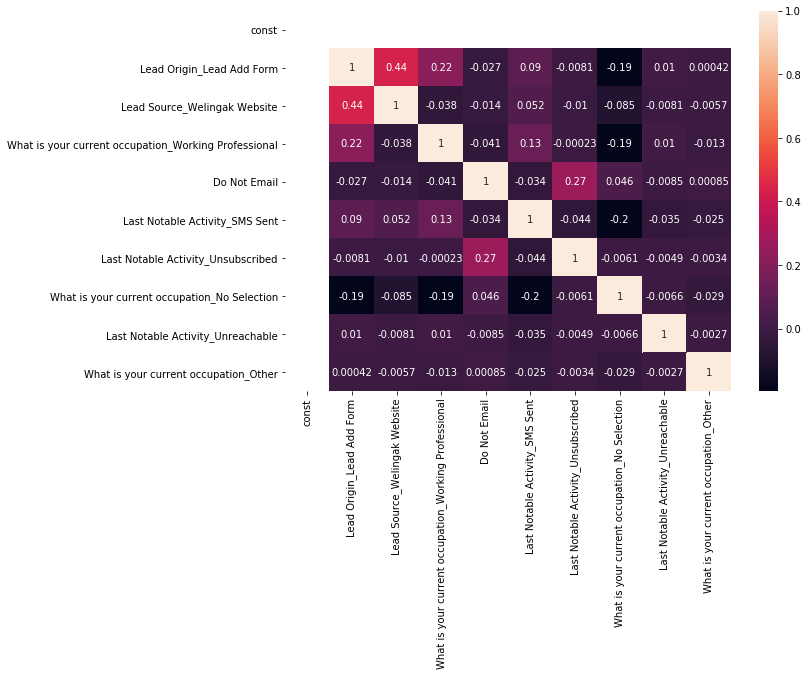

In [104]:
# correlation matrix for the selected variables
plt.figure(figsize = (10,7))        
sns.heatmap(X_train_sm.corr(),annot = True)
plt.show()

### Making Prediction - Based on Model 7  

Predictions on Training data

In [105]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [106]:
y_train_pred[:10]

array([0.29305131, 0.29305131, 0.11794377, 0.11794377, 0.68146932,
       0.29305131, 0.84707259, 0.29305131, 0.68146932, 0.29305131])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [108]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convertion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()
y_train_pred_final['predicted'] = y_train_pred_final.Convertion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final['Convertion_Prob'] = y_train_pred

In [109]:
y_train_pred_final.head()

Converted  Convertion_Prob  LeadID  predicted
0  0          0.293051         602     0        
1  0          0.293051         1492    0        
2  0          0.117944         4105    0        
3  0          0.117944         1206    0        
4  0          0.681469         7388    1

In [110]:
# Creating new column 'predicted' with 1 if Covertion Prob > 0.7 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convertion_Prob.map(lambda x: 1 if x > 0.7 else 0)
y_train_pred_final.head()

Converted  Convertion_Prob  LeadID  predicted
0  0          0.293051         602     0        
1  0          0.293051         1492    0        
2  0          0.117944         4105    0        
3  0          0.117944         1206    0        
4  0          0.681469         7388    0

In [111]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3767   72]
 [1596  785]]


In [112]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7318327974276527


In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
# sensitivity /Recall
TP / float(TP+FN)

0.32969340613187736

In [115]:
# specificity
TN / float(TN+FP)

0.981245115915603

In [116]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.01875488408439698


In [117]:
# positive predictive value /Precision
print (TP / float(TP+FP))

0.9159859976662778


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7024053701286593


##### Summary of Model Performance - 0.7 prob cutoff.

Accuracy - 73%
Precision - 91%
Sensitivity - 33%
Specificity - 98%

### Finding optimial cut off 

In [119]:
### Finding Optimal Cutoff Point

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convertion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Convertion_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0  0          0.293051         602     0          1    1    1    0    0     
1  0          0.293051         1492    0          1    1    1    0    0     
2  0          0.117944         4105    0          1    1    0    0    0     
3  0          0.117944         1206    0          1    1    0    0    0     
4  0          0.681469         7388    0          1    1    1    1    1     

   0.5  0.6  0.7  0.8  0.9  
0  0    0    0    0    0    
1  0    0    0    0    0    
2  0    0    0    0    0    
3  0    0    0    0    0    
4  1    1    0    0    0

In [120]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.382797  1.000000  0.000000
0.1  0.1   0.432154  0.993280  0.084136
0.2  0.2   0.630707  0.938681  0.439698
0.3  0.3   0.773473  0.628307  0.863506
0.4  0.4   0.777492  0.620748  0.874707
0.5  0.5   0.768810  0.565729  0.894764
0.6  0.6   0.768489  0.564049  0.895285
0.7  0.7   0.731833  0.329693  0.981245
0.8  0.8   0.730547  0.325493  0.981766
0.9  0.9   0.686817  0.188576  0.995832


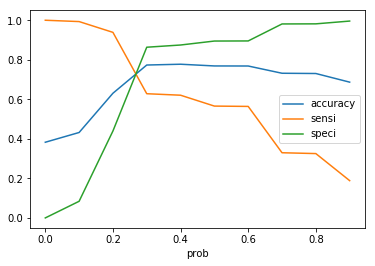

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Optimal cut off will be 0.28. However, considering the need of the business, it will be retained at 0.7 to provide 

### RoC Curve

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convertion_Prob, drop_intermediate = False )

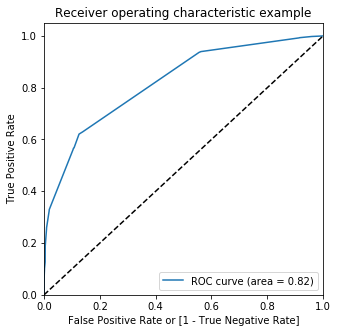

In [124]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convertion_Prob)

In [125]:
df.loc[(df['Rank']==2)]

ColumnName  Value  Rank
8  Lead Origin_Quick Add Form  False  2

### Model 8 - including Rank 2 variable

In [126]:
### including rank 2 - Lead Origin_Quick Add Form
col=['Lead Origin_Quick Add Form','Lead Origin_Lead Add Form','Lead Source_Welingak Website','What is your current occupation_Working Professional','Do Not Email','Last Notable Activity_SMS Sent','Last Notable Activity_Unsubscribed','What is your current occupation_No Selection','Last Notable Activity_Unreachable','What is your current occupation_Other']


In [127]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res9 = logm9.fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6209
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3002.7
Date:                Sun, 03 Mar 2019   Deviance:                       6005.4
Time:                        19:42:00   Pearson chi2:                 6.25e+03
No. Iterations:                    19   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8816      0.043    -20.324      0.000      -0.967      -0.797
Lead Origin_Quick Add Form                              23.0635   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Origin_Lead Add Form                                2.5956      0.192     13.529      0.000       2.220       2.972
Lead Source_Welingak Website                             2.6441      1.026      2.577      0.010       0.633       4.656
What is your current occupation_Working Professional     2.4382      0.167     14.587      0.000       2.111       2.766
Do Not Email                                            -1.6158      0.171     -9.465      0.000      -1.950      -1.281
Last Notable Activity_SMS Sent                           1.6434      0.073     22.571      0.000       1.501       1.786
Last Notable Activity_Unsubscribed                       1.6023      0.429      3.739      0.000       0.762       2.442
What is your current occupation_No Selection            -1.1303      0.079    -14.316      0.000      -1.285      -0.976
Last Notable Activity_Unreachable                        1.8599      0.506      3.673      0.000       0.867       2.852
What is your current occupation_Other                    1.6095      0.642      2.506      0.012       0.351       2.868
========================================================================================================================
"""

Adding next best variable doesnt improve the model.

### Precision and recall tradeoff

In [128]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       0
 6       1
 7       0
 8       1
 9       0
 10      0
 11      1
 12      0
 13      0
 14      0
 15      1
 16      1
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      1
 26      0
 27      0
 28      1
 29      0
        ..
 6190    0
 6191    1
 6192    1
 6193    1
 6194    0
 6195    1
 6196    0
 6197    1
 6198    1
 6199    1
 6200    0
 6201    0
 6202    0
 6203    0
 6204    0
 6205    1
 6206    1
 6207    1
 6208    0
 6209    1
 6210    1
 6211    0
 6212    0
 6213    1
 6214    0
 6215    0
 6216    1
 6217    0
 6218    1
 6219    0
 Name: Converted, Length: 6220, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
 5       0
 6       1
 7       0
 8       0
 9       0
 10      0
 11      1
 12      0
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      

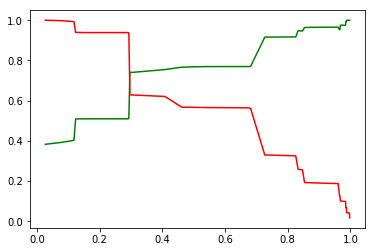

In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convertion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [130]:
X_test[['TotalVisits']] = scaler.transform(X_test[['TotalVisits']])

In [131]:
col=['Lead Origin_Lead Add Form','Lead Source_Welingak Website','What is your current occupation_Working Professional','Do Not Email','Last Notable Activity_SMS Sent','Last Notable Activity_Unsubscribed','What is your current occupation_No Selection','Last Notable Activity_Unreachable','What is your current occupation_Other']

X_test = X_test[col]
X_test.head()

Lead Origin_Lead Add Form  Lead Source_Welingak Website  \
3340  0                          0                              
3411  1                          0                              
8349  0                          0                              
2912  0                          0                              
4967  0                          0                              

      What is your current occupation_Working Professional  Do Not Email  \
3340  0                                                     0              
3411  0                                                     0              
8349  0                                                     0              
2912  0                                                     0              
4967  1                                                     0              

      Last Notable Activity_SMS Sent  Last Notable Activity_Unsubscribed  \
3340  0                               0                                    
3411  0                               0                                    
8349  0                               0                                    
2912  1                               0                                    
4967  0                               0                                    

      What is your current occupation_No Selection  \
3340  0                                              
3411  0                                              
8349  1                                              
2912  0                                              
4967  0                                              

      Last Notable Activity_Unreachable  What is your current occupation_Other  
3340  0                                  0                                      
3411  0                                  0                                      
8349  0                                  0                                      
2912  0                                  0                                      
4967  0                                  0

In [132]:
X_test_sm = sm.add_constant(X_test)

In [133]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3340    0.293051
3411    0.847073
8349    0.117944
2912    0.681469
4967    0.825667
4167    0.681469
5093    0.681469
7192    0.293051
5127    0.293051
1195    0.681469
dtype: float64

In [135]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [136]:
y_pred_final.head()

Converted  LeadID         0
0  0          3340    0.293051
1  1          3411    0.847073
2  0          8349    0.117944
3  1          2912    0.681469
4  0          4967    0.825667

In [137]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convertion_Prob'})

In [138]:
y_pred_final['final_predicted'] = y_pred_final.Convertion_Prob.map(lambda x: 1 if x > 0.7 else 0)

In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7247844019497562

In [140]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1613,   27],
       [ 707,  320]], dtype=int64)

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# sensitivity of Test data 
TP / float(TP+FN)

0.31158714703018503

In [143]:
# positive predictive value /Precision of Test data 
TP / float(TP+FP)

0.9221902017291066

In [144]:
#  specificity of Test data 
TN / float(TN+FP)

0.9835365853658536

<B>Summary :</B>
Parameters impacting the lead conversion :
    1. Lead Origin_Lead Add Form
    2. Lead Source_Welingak Website
    3. What is your current occupation_Working Professional
    4. Last Notable Activity_SMS Sent
    5. Do Not Email - No email - Mailing has negative coeff.
    6. Last Notable Activity_Unsubscribed.
    7. What is your current occupation_No Selection	 - If not inputs provided, weak lead.
    8. What is your current occupation_Other - Other category professsional 